### 간단히 DNN을 이용해 영아 울음소리 분류 모델.

In [36]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [37]:
# OS setup
main_path = os.getcwd()
data_path = os.path.join(main_path, 'data')
origin_file_path = os.path.join(data_path, 'donateacry_corpus_cleaned_and_updated_data')

label_list = ['belly_pain','discomfort','burping','tired','hungry']

In [38]:
# Load audio info page
df = pd.read_csv(os.path.join(data_path, 'audio_info.csv'))
df.tail(3)

,gender,age,status,file
454,m,4,hu,hungry/F24DE44B-762C-4149-AC92-96A5E57ED118-14...
455,m,72,hu,hungry/bb2bdafb-0477-4be4-8c41-1a6192e8c6d4-14...
456,f,26,hu,hungry/ca7d8d54-13cb-4060-8db4-90651b60c078-14...


In [39]:
# Get audio and label list
audio_list = df['file'].tolist()
label_list = df['status'].tolist()

print(f'[{len(audio_list)}] File list : {audio_list[:10]}')
print(f'[{len(label_list)}] Label     : {label_list[:3]}')

[457] File list : ['belly_pain/999bf14b-e417-4b44-b746-9253f81efe38-1430974001343-1.7-m-26-bp.wav', 'belly_pain/C421C6FE-DFEE-4080-8AEA-848E7CE4756B-1430548333-1.0-f-26-bp.wav', 'belly_pain/d6cda191-4962-4308-9a36-46d5648a95ed-1431159262344-1.7-m-04-bp.wav', 'belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138524-1.0-m-72-bp.wav', 'belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138647-1.0-m-72-bp.wav', 'belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav', 'belly_pain/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.wav', 'belly_pain/ae5f103b-5fee-442f-bb1b-d9d0570c46ab-1431533857965-1.7-m-26-bp.wav', 'belly_pain/d6cda191-4962-4308-9a36-46d5648a95ed-1431159272600-1.7-m-04-bp.wav', 'belly_pain/d6cda191-4962-4308-9a36-46d5648a95ed-1431700390946-1.7-m-04-bp.wav']
[457] Label     : ['bp', 'bp', 'bp']


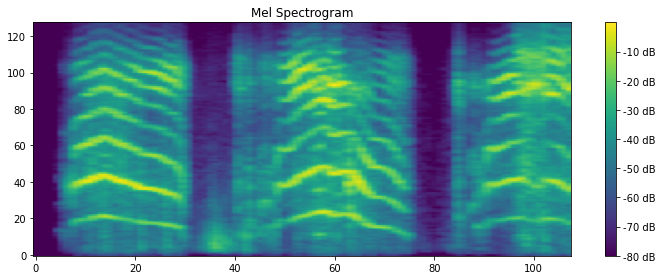

In [40]:
# See mel spectrogram
def audio_to_mel_spectrogram(audio_path, n_fft=2048, hop_length=512, n_mels=128):
    # Step 1: Load the audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Step 2: Compute the Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    # Step 3: Convert the power spectrogram to the Mel scale
    mel_spec = librosa.feature.melspectrogram(S=stft**2, sr=sr, n_mels=n_mels)

    # Step 4: Convert to dB scale (optional but often used for visualization)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    return mel_spec_db


audio_file_path = os.path.join(origin_file_path, audio_list[0])
mel_spec = audio_to_mel_spectrogram(audio_file_path)

# Display the Mel Spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spec, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


Epoch 1/50
 4/11 [=========>....................] - ETA: 0s - loss: 206.8847 - accuracy: 0.7812

2023-07-25 18:44:11.075169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 31ms/step - loss: 288.8030 - accuracy: 0.7317 - val_loss: 39.4703 - val_accuracy: 0.8649
Epoch 2/50
 7/11 [==================>...........] - ETA: 0s - loss: 217.3613 - accuracy: 0.6875

2023-07-25 18:44:11.441849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 24ms/step - loss: 218.0694 - accuracy: 0.7073 - val_loss: 88.6331 - val_accuracy: 0.0541
Epoch 3/50
11/11 [==============================] - 0s 20ms/step - loss: 128.5514 - accuracy: 0.7165 - val_loss: 503.5686 - val_accuracy: 0.0541
Epoch 4/50
11/11 [==============================] - 0s 18ms/step - loss: 136.5616 - accuracy: 0.7195 - val_loss: 20.3828 - val_accuracy: 0.7027
Epoch 5/50
11/11 [==============================] - 0s 18ms/step - loss: 82.6394 - accuracy: 0.7622 - val_loss: 28.4775 - val_accuracy: 0.8649
Epoch 6/50
11/11 [==============================] - 0s 18ms/step - loss: 49.2424 - accuracy: 0.7683 - val_loss: 30.5079 - val_accuracy: 0.0541
Epoch 7/50
11/11 [==============================] - 0s 19ms/step - loss: 26.4327 - accuracy: 0.6524 - val_loss: 10.4510 - val_accuracy: 0.8649
Epoch 8/50
11/11 [==============================] - 0s 19ms/step - loss: 9.9687 - accuracy: 0.7622 - val_loss: 0.8536 - val_accuracy: 0.8649
Epoch 9/

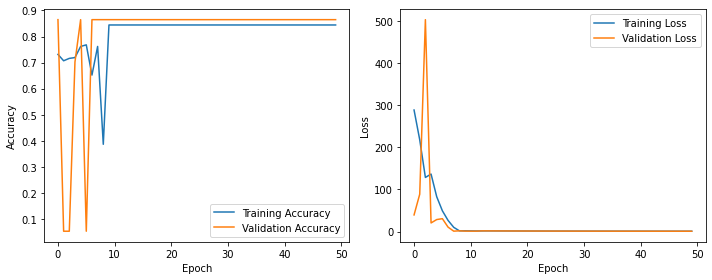

In [41]:
def compute_mel_spectrogram(audio_path, n_fft=2048, hop_length=512, n_mels=128):
    """
    멜 스펙트럼을 계산하는 함수

    Parameters:
        audio_path (str): 오디오 파일 경로
        n_fft (int): FFT(Fast Fourier Transform) 창의 크기 (default: 2048)
        hop_length (int): 이동 크기 (default: 512)
        n_mels (int): 멜 밴드의 수 (default: 128)

    Returns:
        mel_spectrogram (ndarray): 계산된 멜 스펙트럼
        sr (int): 오디오의 샘플링 레이트(초당 추출하는 샘플링 개수)
    """
    
    # 오디오 파일 불러오기 | audio.shape==(55680,) | sr=8000
    audio, sr = librosa.load(audio_path, sr=None)

    # 멜 스펙트럼 계산(y에 대한 멜 스펙트럼을 계산) | mel_spectrogram.shape=(128,109)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

    # 로그 스케일 변환: 이를 통해 스펙트럼의 에너지를 더 쉽게 관찰하고, 시각화할 수 있다.
    # ref=np.max는 로그 변환 시 사용되는 기준값을 의미하며, 여기서는 스펙트럼 값 중 가장 큰 값으로 정규화한다.
    # mel_spectrogram.shape=(128,109)
    # 128이 세로이고 음석파일의 길이에 따라 가로 길이(두번째 숫자)가 길어지는 것 같다.
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    return mel_spectrogram, sr


def plot_mel_spectrogram(mel_spectrogram, sr, title='Mel Spectrogram'):
    """
    멜 스펙트럼을 그래프로 그리는 함수

    Parameters:
        mel_spectrogram (ndarray): 멜 스펙트럼
        sr (int): 오디오의 샘플링 레이트
        title (str): 그래프 제목 (default: 'Mel Spectrogram')
    """
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

def extract_features_and_labels(audio_files, class_labels):
    features, labels = [], []
    for file, label in zip(audio_files, class_labels):
        mel_spectrogram, _ = compute_mel_spectrogram(file)
        features.append(mel_spectrogram)
        labels.append(label)

    # [(128,109), (128, 109), (128, 108), (129, 110), ...]
    # max: (128, 109) | min: (128, 102)
    for i in range(len(features)):
        features[i] = np.array([feature[:102] for feature in features[i]])

    # 신경망 모델을 위해 데이터 변환
    features = np.array(features)
    labels = np.array(labels)

    return features, labels


def create_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def main(label_encoder):
    # 음성 파일 경로와 클래스 레이블 지정
    audio_files = [os.path.join(origin_file_path, audio) for audio in audio_list]
    class_labels = label_list

    # 멜 스펙트럼과 클래스 레이블 추출
    X, y = extract_features_and_labels(audio_files, class_labels)

    # 클래스 레이블 인코딩 및 원-핫 인코딩
    y_encoded = label_encoder.fit_transform(y)
    num_classes = len(label_encoder.classes_)
    y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

    # 데이터 분할: 훈련 세트와 테스트 세트
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

    # 신경망 모델 생성
    input_shape = X_train[0].shape
    model = create_model(input_shape, num_classes)

    # 신경망 모델 학습
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

    # 모델 평가
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.2f}")

    # 학습 과정 그래프
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model, label_encoder

label_encoder = LabelEncoder()
model, label_encoder = main(label_encoder)


In [42]:
# Make predictions on a new audio file
new_audio_file = os.path.join(data_path, 'sample2.wav') # Tired가 나오면 맞다.

# 예측을 수행할 때 모델에서 학습한 음성 길이로 맞추어주어야 한다. 
# 위 모델은 (128, 108)로 학습하였음으로 입력 데이터는 (1, 128, 108)의 shape를 가지고 있어야 한다.
mel_spectrogram, _ = compute_mel_spectrogram(new_audio_file)
mel_spectrogram = np.array([feature[:102] for feature in mel_spectrogram])
mel_spectrogram = np.expand_dims(mel_spectrogram, axis=0)

predicted_probs = model.predict(mel_spectrogram)
predicted_class = label_encoder.classes_[np.argmax(predicted_probs)]

def get_status(predicted_class):
    if predicted_class == 'hu':
        return 'hungry'
    elif predicted_class == 'ti':
        return 'tired'
    elif predicted_class == 'bu':
        return 'burping'
    elif predicted_class == 'bp':
        return 'belly_pain'
    elif predicted_class == 'dc':
        return 'discomfort'
    return 'DO NOT KNOW'

print(f"Predicted class: {get_status(predicted_class)}\n")
for i in range(len(predicted_probs[0])):
    print(f'{get_status(label_encoder.classes_[i])}: {predicted_probs[0][i]*100:.2f}%')

Predicted class: hungry

belly_pain: 9.06%
burping: 7.98%
DO NOT KNOW: 3.90%
discomfort: 5.55%
hungry: 65.81%
tired: 7.70%


2023-07-25 18:44:21.511155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
